In [2]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch

In [34]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

## Cost Surface

Bias: horizontal offset

## Train the Model

In [35]:
# Create f(X) with a slope of 1 and a bias of -1

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1

# Add noise

Y = f + 0.1 * torch.randn(X.size())

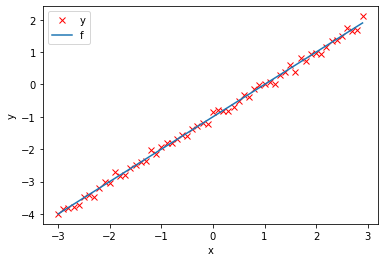

In [36]:
# Plot out the line and the points with noise

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<Figure size 432x288 with 0 Axes>

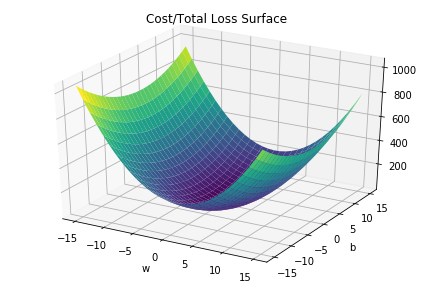

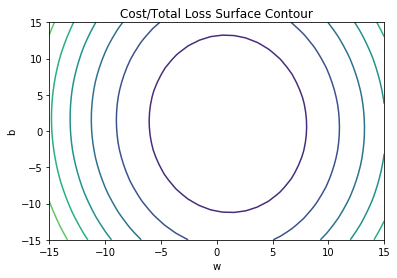

In [37]:
get_surface = plot_error_surfaces(15, 15, X, Y, 30)

## Create the Model and Cost Function

In [38]:
# Define the forward function
def forward(x):
    y = w * x + b
    return y

# Define the MSE loss function
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)


In [39]:
# initialize the parameters
w = torch.tensor(-15., requires_grad=True)
b = torch.tensor(-10., requires_grad=True)
lr = 0.1
LOSS = []

In [40]:
def train_model(iter):
    for epoch in range(iter):
        # Preiction
        Yhat = forward(X)
        # Loss
        loss = criterion(Yhat, Y)
        LOSS.append(loss.item())
        
        # Plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.data.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # Backward
        loss.backward()

        #update the data
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        #Zero the gradidents
        w.grad.data.zero_()
        b.grad.data.zero_()

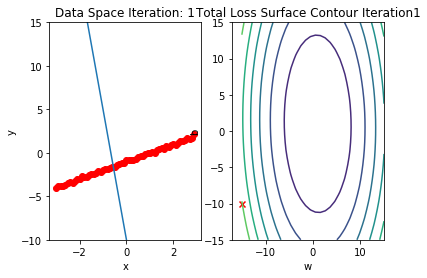

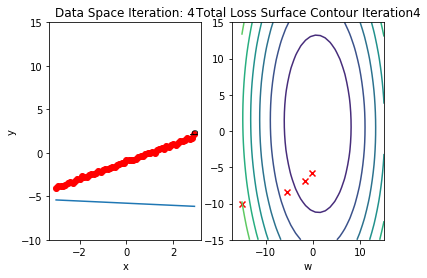

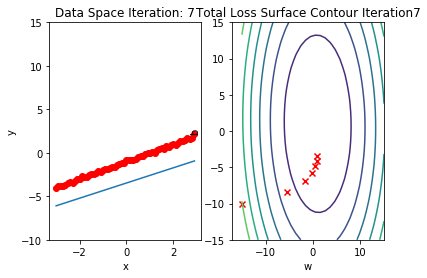

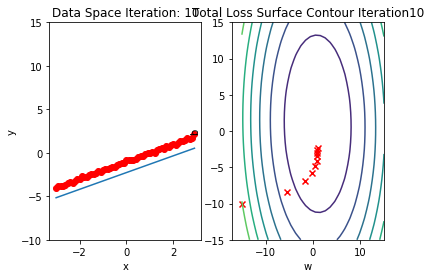

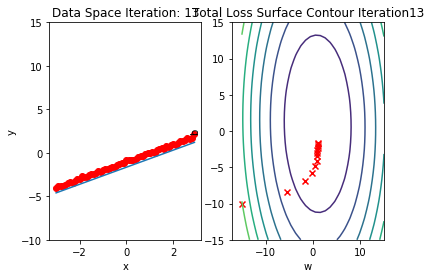

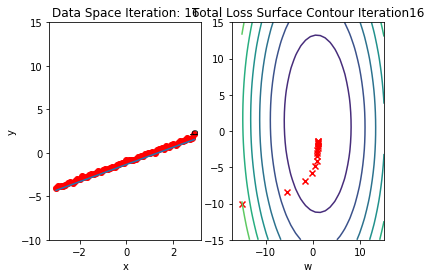

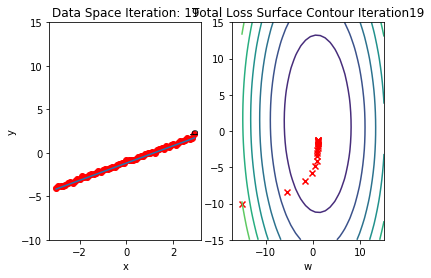

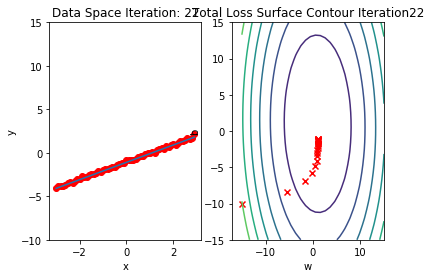

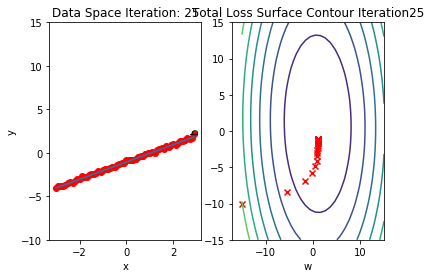

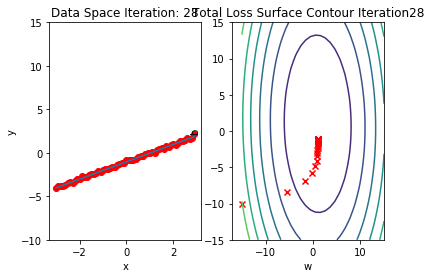

In [41]:
train_model(30)

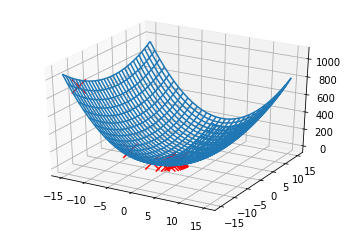

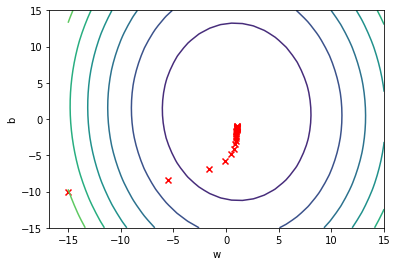

Text(24.125, 0.5, 'Cost')

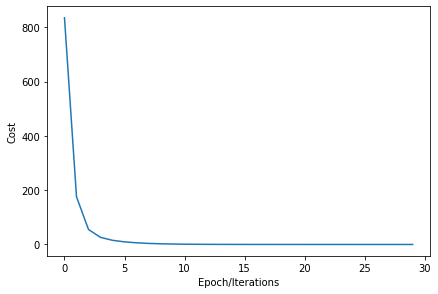

In [43]:
# Plot out the result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")